In [1]:
  from keras.datasets import fashion_mnist

from keras.utils import np_utils  
import numpy as np  

import sys
sys.path.append('../')
from util.my_plot import plot_single, plot_batch, show_train_history, plot_images_labels_prediction, plot_image, plot_value_array
  

Using TensorFlow backend.


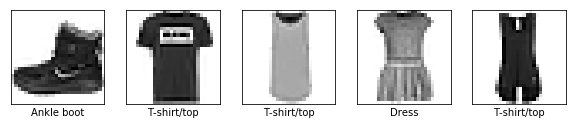

In [3]:
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = fashion_mnist.load_data()  

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_batch(X_Train, y_Train,class_names ,5)
    

In [4]:
# Translation of data  
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')  

X_Train40.shape

(60000, 28, 28, 1)

In [5]:
y_Train.shape

(60000,)

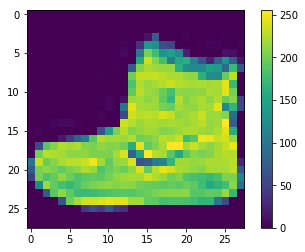

In [6]:
plot_single(X_Train40[0].reshape(28,28))

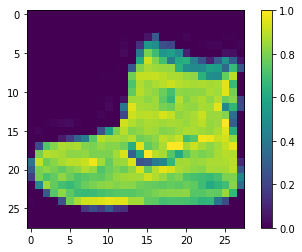

In [7]:
# Standardize feature data  
X_Train40_norm = X_Train40 / 255  
X_Test40_norm = X_Test40 /255  
plot_single(X_Train40_norm[0].reshape(28,28))

# 建立模型

In [8]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
import tensorflow as tf

In [9]:
# Convolution layer

model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16, kernel_size=(5,5),  
                 padding='same',input_shape=(28,28,1), activation=tf.nn.relu))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36, kernel_size=(5,5),
                 padding='same', activation=tf.nn.relu))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25))  

In [10]:
# MLP
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer='normal'))

In [11]:
# 定義訓練方式  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               451840    
__________

# 訓練模型

In [12]:
# 開始訓練  
train_history = model.fit(x=X_Train40_norm, y=y_Train, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 22s - loss: 0.7546 - acc: 0.7261 - val_loss: 0.4626 - val_acc: 0.8272
Epoch 2/10
 - 22s - loss: 0.4642 - acc: 0.8309 - val_loss: 0.3879 - val_acc: 0.8557
Epoch 3/10
 - 22s - loss: 0.4011 - acc: 0.8555 - val_loss: 0.3430 - val_acc: 0.8741
Epoch 4/10
 - 22s - loss: 0.3682 - acc: 0.8657 - val_loss: 0.3227 - val_acc: 0.8838
Epoch 5/10
 - 22s - loss: 0.3399 - acc: 0.8766 - val_loss: 0.3071 - val_acc: 0.8867
Epoch 6/10
 - 22s - loss: 0.3202 - acc: 0.8839 - val_loss: 0.2891 - val_acc: 0.8935
Epoch 7/10
 - 22s - loss: 0.3052 - acc: 0.8887 - val_loss: 0.2758 - val_acc: 0.8990
Epoch 8/10
 - 22s - loss: 0.2957 - acc: 0.8916 - val_loss: 0.2692 - val_acc: 0.9007
Epoch 9/10
 - 22s - loss: 0.2760 - acc: 0.8988 - val_loss: 0.2588 - val_acc: 0.9050
Epoch 10/10
 - 22s - loss: 0.2686 - acc: 0.9018 - val_loss: 0.2549 - val_acc: 0.9055


# 以圖形顯示訓練過程

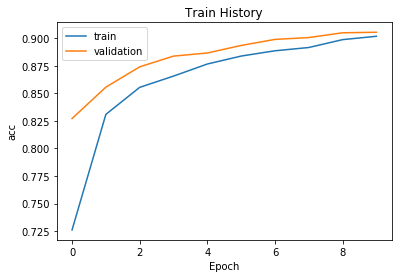

In [13]:
show_train_history(train_history, 'acc', 'val_acc')  

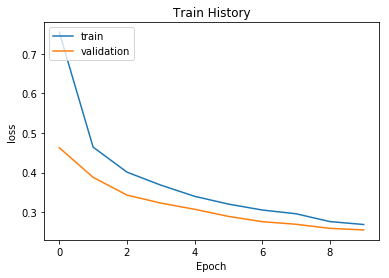

In [14]:
show_train_history(train_history, 'loss', 'val_loss')  

# 評估模型準確率

In [15]:
scores = model.evaluate(X_Test40_norm, y_Test)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 1s 147us/step
	[Info] Accuracy of testing data = 90.0%


# 進行預測

In [16]:
print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm
()
	[Info] Show 10 prediction result (From 240):
[5 4 9 2 2 8 6 4 6 2]



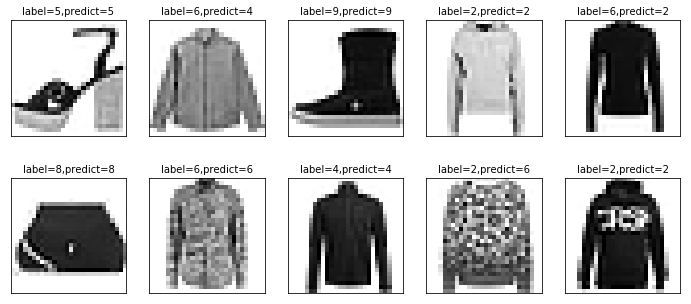

In [17]:
plot_images_labels_prediction(X_Test, y_Test, prediction, idx=240)  

In [18]:
import pandas as pd  
print("\t[Info] Display Confusion Matrix:")  
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])  

	[Info] Display Confusion Matrix:


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,850,2,16,15,7,1,103,0,6,0
1,1,982,0,11,3,0,2,0,1,0
2,9,2,799,9,102,0,79,0,0,0
3,17,5,12,903,32,0,29,0,2,0
4,2,1,37,21,875,0,63,0,1,0
5,0,0,0,0,0,973,0,17,0,10
6,122,2,48,23,88,0,711,0,6,0
7,0,0,0,0,0,10,0,961,0,29
8,3,1,3,2,6,1,5,3,976,0


# 針對位移過的圖進行預測

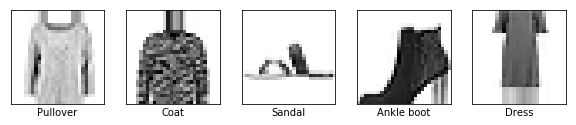

In [20]:
from util.my_plot import generate_shift_fashion_mnist_data
shift_img, shift_img_label = generate_shift_fashion_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names ,5)


In [21]:
shift_img = shift_img.reshape(shift_img.shape[0], 28, 28, 1).astype('float32')  
aa_norm = shift_img /255  

scores = model.evaluate(aa_norm, shift_img_label)
print("Accuracy of generated shift data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 1s 147us/step
Accuracy of generated shift data = 78.1%
